### Задание №2

Построить решающее дерево из sklearn на датасете из german credit data из UCI репозитория и визуализируйте его. 
Проинтерпретировать первые несколько разбиений, изучив описание признаков. Построить график зависимости качества на кросс-валидации и на обучающей выборке от глубины дерева. 

In [88]:
import pydotplus 
import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

import numpy as np
import urllib.request
import matplotlib.pyplot as plt

In [89]:
# URL for the German Credit Data dataset (UCI Machine Learning Repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
# download the file
credit_data = urllib.request.urlopen(url)
# load the CSV file as a numpy matrix
dataset = np.loadtxt(credit_data)
print(dataset.shape)
# separate the data from the target attributes
features = dataset[:, 0:23] # attributes from 1 to 24
classes = dataset[:,24] #the 25th attribute

(1000, 25)


#### Визуализация

In [90]:
model = tree.DecisionTreeClassifier()
model.fit(features,classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

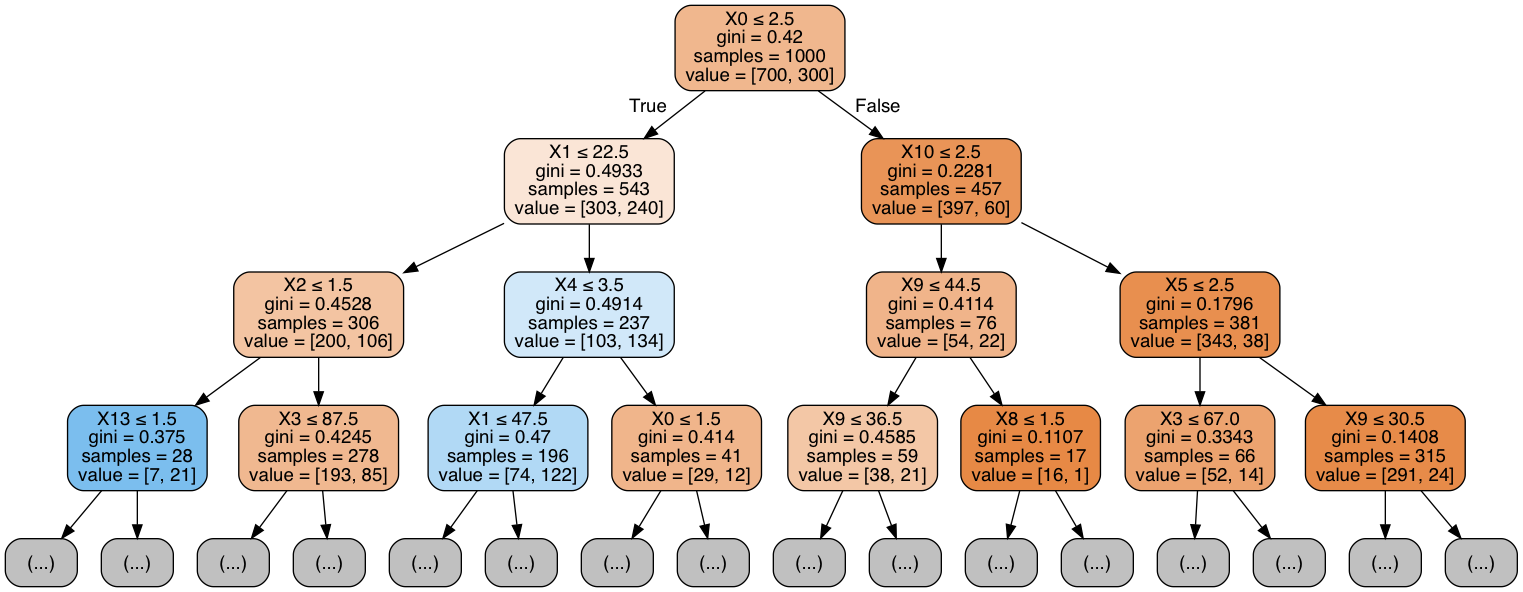

In [91]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out",max_depth = 3,
                                special_characters=True,filled=True, rounded=True)

graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")
Image(graph.create_png())

#### Интерпретация

1 уровень: TRUE - аккаунты с DM < 200, FALSE - аккаунты с DM >= 200 или аккаунта не существует.

2 уровень: 

1 лист: количество месяцев выплат: TRUE - duration<=22, FALSE - >22

2 лист: нынешнее место жительства: TRUE - <= 2 года, FALSE - больше 2 лет

3 уровень:

1 лист: кредитная история 

2 лист: объем кредита

3 лист: наличие поручителя или другого выплачивающего: TRUE - нет/есть соплательщик, FALSE - поручитель

4 лист: состояние сберегательного счета

#### Строим зависимость качества от глубины дерева на кросс-валидации и на обучающей выборке.

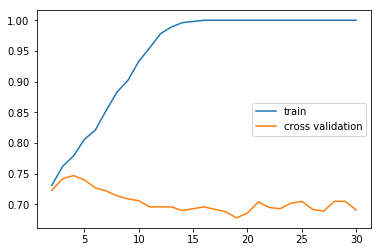

Max accuracy 1.0
Depth 14


In [95]:
cross_val_acc = []
train_acc = []
N = 30
for i in range(N+1)[2:]:
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(features,classes)
    train_acc.append(accuracy_score(classes, model.predict(features)))
    cross_val_acc.append(np.mean(cross_val_score(model, features, classes)))

plt.plot(range(N+1)[2:], train_acc, label='train')
plt.plot(range(N+1)[2:], cross_val_acc, label='cross validation')
plt.legend()
plt.show()

print ('Max accuracy', np.max(train_acc))
print ('Depth', np.argmax(train_acc))